In [22]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


In [23]:
data = pd.read_csv("bank-full.csv", delimiter = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [25]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
data["job"] = data["job"].astype('category').cat.codes
data["marital"] = data["marital"].astype('category').cat.codes
data["education"] = data["education"].astype('category').cat.codes
data["default"] = data["default"].astype('category').cat.codes
data["housing"] = data["housing"].astype('category').cat.codes
data["loan"] = data["loan"].astype('category').cat.codes
data["contact"] = data["contact"].astype('category').cat.codes
data["month"] = data["month"].astype('category').cat.codes
data["poutcome"] = data["poutcome"].astype('category').cat.codes
data["y"] = data["y"].astype('category').cat.codes
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [28]:
data["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


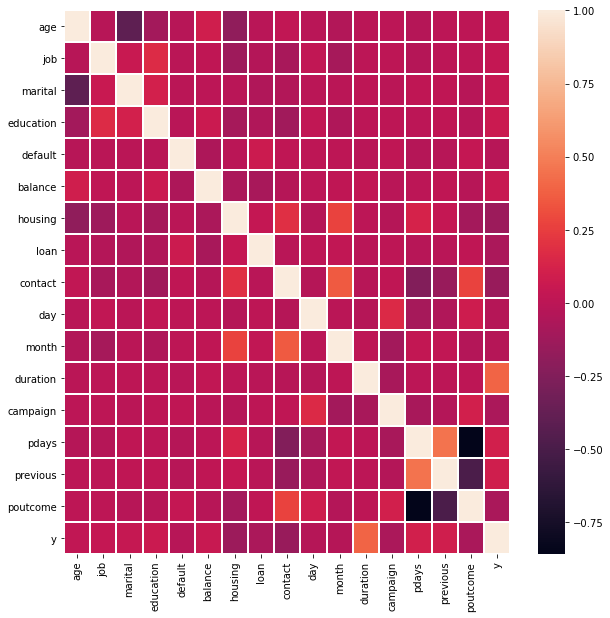

In [29]:
corr = data.corr("pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1)
corr

<AxesSubplot:>

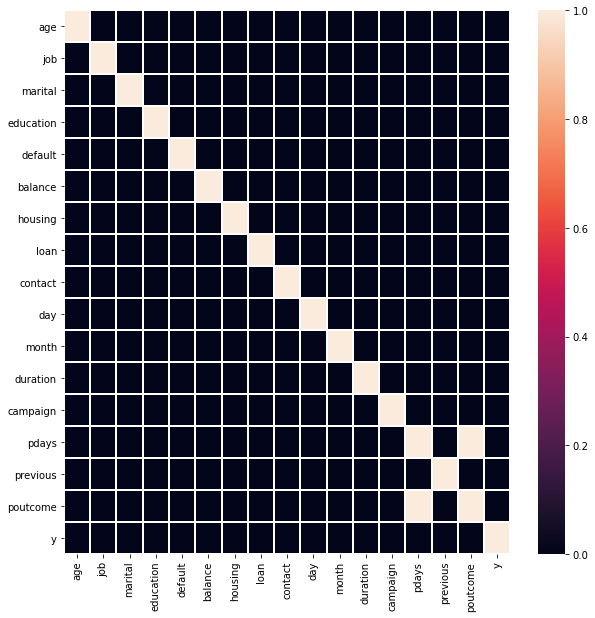

In [30]:
plt.figure(figsize = (10, 10))
sns.heatmap(abs(corr) > 0.5, linewidth = 1)

In [31]:
data_minus_poutcome = data.drop(columns=["poutcome"])
data_minus_poutcome

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,0


In [32]:
x, y = data_minus_poutcome.values[:, :-1], data.values[:, -1]
x.shape

(45211, 15)

In [33]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(31647, 15)

In [35]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[11743,   226],
       [ 1306,   289]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.8870539663815984

In [38]:
data_minus_pdays = data.drop(columns=["pdays"])
data_minus_pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,0,3,0


In [39]:
x, y = data_minus_pdays.values[:, :-1], data.values[:, -1]
x.shape

(45211, 15)

In [40]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(31647, 15)

In [42]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[11747,   222],
       [ 1323,   272]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.8860955470362725

# Code for imbalance dataset classification is taken from [here](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

In [45]:
class_count_0, class_count_1 = data['y'].value_counts()

# Separate class
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('ratio of class 0 to class 1:', class_count_0/class_count_1)

class 0: (39922, 17)
class 1: (5289, 17)
ratio of class 0 to class 1: 7.548118737001324


# Classification using Random Undersampling

total class of 1 and 0:
 1    5289
0    5289
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

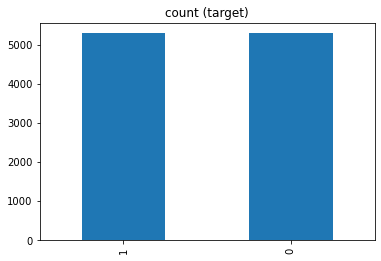

In [46]:
class_0_under = class_0.sample(class_count_1)

undersampled_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",undersampled_data['y'].value_counts())
# plot the count after under-sampeling
undersampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [47]:
undersampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29670,56,4,1,2,0,2366,1,1,0,3,3,538,2,188,4,0,0
158,52,1,1,1,0,782,1,0,2,5,8,93,3,-1,0,3,0
42653,35,7,2,1,0,3816,0,0,0,13,4,331,2,195,1,1,0
37270,31,1,1,0,0,1127,1,0,1,13,8,43,1,349,1,0,0
40742,27,9,2,2,0,290,0,0,0,10,1,88,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [48]:
x, y = undersampled_data.iloc[:, :-1], undersampled_data.iloc[:, -1]
print(x.shape, y.shape)

(10578, 16) (10578,)


In [49]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(7404, 16)

In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
model.score(x_test, y_test)

0.7977315689981096

# Classification using Random Oversampling

total class of 1 and 0: 1    39922
0    39922
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

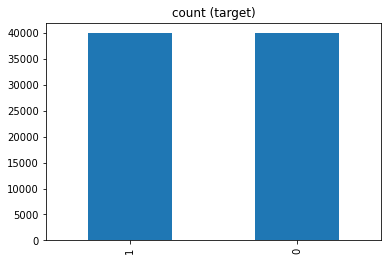

In [53]:
class_1_over = class_1.sample(class_count_0, replace=True)

oversampled_data = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",oversampled_data['y'].value_counts())
# plot the count after over-sampeling
oversampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [54]:
oversampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43207,42,4,1,2,0,144,0,0,0,4,7,148,1,87,4,0,1
31985,42,1,1,0,0,2103,1,0,0,13,0,384,2,-1,0,3,1
9499,53,9,1,1,0,480,0,0,2,6,6,648,2,-1,0,3,1
45191,75,5,0,2,0,3810,1,0,0,16,9,262,1,183,1,0,1
17083,42,1,2,0,0,1628,1,0,0,25,5,590,8,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,4,1,2,0,138,1,1,0,16,9,162,2,187,5,0,0
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [55]:
x, y = oversampled_data.iloc[:, :-1], oversampled_data.iloc[:, -1]
print(x.shape, y.shape)

(79844, 16) (79844,)


In [56]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.31168831, 0.36363636, 0.5       , ..., 0.10091743, 0.01454545,
        0.        ],
       [0.31168831, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.45454545, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20779221, 0.09090909, 1.        , ..., 0.60894495, 0.04363636,
        0.33333333],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.21674312, 0.04      ,
        0.33333333]])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [58]:
model = LogisticRegression(max_iter = 150)
model.fit(x_train, y_train)

LogisticRegression(max_iter=150)

In [59]:
model.score(x_test, y_test)

0.8026634382566586

# Classification using Synthetic Minority Oversampling Technique (SMOTE)

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x, y = data.iloc[:, :-1], data.iloc[:, -1]

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 39922, 1: 5289})
Resample dataset shape Counter({0: 39922, 1: 39922})


In [61]:
print(x_smote.shape, y_smote.shape)

(79844, 16) (79844,)


In [62]:
scaler = MinMaxScaler()
scaler.fit(x_smote)
x_scaled = scaler.transform(x_smote)
x_scaled

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.19480519, 0.36363636, 0.        , ..., 0.37729358, 0.01454545,
        0.        ],
       [0.20779221, 0.27272727, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.37662338, 0.72727273, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [64]:
model = LogisticRegression(max_iter = 150)
model.fit(x_train, y_train)

LogisticRegression(max_iter=150)

In [65]:
model.score(x_test, y_test)

0.8538448693328881